# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# CELL 1
# VERIFIED AS WORKING
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# CELL 2
# VERIFIED AS WORKING
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#len(lat_lngs)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
# CELL 3
# VERIFIED AS WORKING
# Purpose: call api for example city to verify structure
cities[0]

url = "http://api.openweathermap.org/data/2.5/weather?"
# Temporarily try chicago as a test and to see the structure of the response
city = "Chicago"
units = "metric"

# Build query URL
#query_url = url + "appid=" + weather_api_key + "units" + units + "&q=" + city
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
#print(query_url)

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
pprint(weather_json)
print(weather_json["coord"]["lat"])
print(weather_json["coord"]["lon"])
print(weather_json["main"]["temp_max"])
print(weather_json["main"]["humidity"])
print(weather_json["clouds"]["all"])
print(weather_json["wind"]["speed"])
print(weather_json["sys"]["country"])
print(weather_json["dt"])

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 41.85, 'lon': -87.65},
 'dt': 1595281126,
 'id': 4887398,
 'main': {'feels_like': 27.57,
          'humidity': 42,
          'pressure': 1015,
          'temp': 28.66,
          'temp_max': 31.11,
          'temp_min': 26.11},
 'name': 'Chicago',
 'sys': {'country': 'US',
         'id': 4861,
         'sunrise': 1595241201,
         'sunset': 1595294415,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 3.6}}
41.85
-87.65
31.11
42
75
3.6
US
1595281126


In [41]:
# CELL 4
# VERIFIED AS WORKING

# Get weather data and put in cities_df

# intialize lists for df
clean_cities = []
latitudes = []
longitudes = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# For loop - get weather data
for i in range(len(cities)):
    #print(i)
    query_url = f"{url}appid={weather_api_key}&q={cities[i]}&units={units}"
    #print(query_url)

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Extract data from the response
    try:
        latitudes.append(weather_json["coord"]["lat"])
        longitudes.append(weather_json["coord"]["lon"])
        max_temps.append(weather_json["main"]["temp_max"])
        humidities.append(weather_json["main"]["humidity"])
        cloudinesses.append(weather_json["clouds"]["all"])
        wind_speeds.append(weather_json["wind"]["speed"])
        countries.append(weather_json["sys"]["country"])
        dates.append(weather_json["dt"])
        clean_cities.append(cities[i])
        print(f"Retriving data on {cities[i]}")
    except KeyError:
        print(f"{cities[i]}: Not Found")
print(len(clean_cities))

Retriving data on albany
attawapiskat: Not Found
Retriving data on kapaa
Retriving data on ushuaia
Retriving data on fare
amderma: Not Found
viligili: Not Found
Retriving data on khasan
Retriving data on lagoa
Retriving data on lebu
Retriving data on barrow
Retriving data on luchegorsk
Retriving data on san quintin
Retriving data on kieta
Retriving data on castro
Retriving data on baykit
Retriving data on portland
Retriving data on bredasdorp
Retriving data on chokurdakh
Retriving data on sauk rapids
Retriving data on dyersburg
Retriving data on indramayu
Retriving data on iqaluit
rungata: Not Found
Retriving data on leningradskiy
Retriving data on punta arenas
Retriving data on kutum
Retriving data on brownwood
Retriving data on cape town
rawannawi: Not Found
Retriving data on thompson
Retriving data on adrar
Retriving data on mataura
Retriving data on hilo
Retriving data on kavieng
Retriving data on lavrentiya
Retriving data on yellowknife
Retriving data on kidal
vaitupu: Not Found
u

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [43]:
# CELL 5
# VERIFIED AS WORKING
# Create Dictionary of all needed columns
cities_dict = {"City": clean_cities,
            "Latitude": latitudes,
            "Longitude": longitudes,
            "Max Temp (C)": max_temps,
            "Humidity": humidities,
            "Cloudiness": cloudinesses,
            "Wind Speed": wind_speeds,
            "Country": countries,
            "Date": dates}
cities_df = pd.DataFrame(cities_dict)
#cities_df["City"] = cities
#cities_df["Latitude"] = latitudes
#cities_df["Longitude"] = longitudes
#cities_df["Max Temp (C)"] = max_temps
#cities_df["Humidity"] = humidities
#cities_df["Cloudiness"] = cloudinesses
#cities_df["Wind Speed"] = wind_speeds
#cities_df["Country"] = countries
#cities_df["Date"] = dates

cities_df

# Replace NaN values with empty values
# no rows dropped
cities_df.dropna()
cities_df.count()
cities_df.dtypes
cities_df

,City,Latitude,Longitude,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,33.33,39,80,4.50,US,1595280523
1,kapaa,22.08,-159.32,28.00,74,90,5.70,US,1595280803
2,ushuaia,-54.80,-68.30,0.00,86,3,1.50,AR,1595280804
3,fare,-16.70,-151.02,25.37,80,45,11.13,PF,1595281275
4,khasan,42.43,130.64,19.69,87,48,3.59,RU,1595281275
...,...,...,...,...,...,...,...,...,...
541,beloha,-25.17,45.05,16.39,74,0,5.75,MG,1595280843
542,billings,45.78,-108.50,26.11,34,40,5.70,US,1595281236
543,puerto baquerizo moreno,-0.90,-89.60,23.00,73,90,6.70,EC,1595281217
544,gazli,40.13,63.45,29.92,17,0,4.46,UZ,1595281350


In [44]:
# CELL 6
# VERIFIED AS WORKING
cities_df.count()

City            546
Latitude        546
Longitude       546
Max Temp (C)    546
Humidity        546
Cloudiness      546
Wind Speed      546
Country         546
Date            546
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
# CELL 7
# VERIFIED AS WORKING
cities_df.describe()

,Latitude,Longitude,Max Temp (C),Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,19.555128,16.992070,20.961062,70.373626,52.580586,3.438205,1.595281e+09
std,33.062598,89.409953,7.575573,20.358430,38.002051,2.233450,2.749468e+02
min,-54.800000,-179.170000,0.000000,3.000000,0.000000,0.140000,1.595281e+09
25%,-8.225000,-62.317500,15.310000,59.000000,15.250000,1.622500,1.595281e+09
50%,21.640000,20.255000,22.000000,75.000000,59.500000,3.070000,1.595281e+09
75%,45.572500,94.440000,26.285000,87.000000,90.000000,4.600000,1.595281e+09
max,78.220000,178.420000,41.110000,100.000000,100.000000,12.510000,1.595281e+09


In [46]:
# CELL 8
# Use .loc to list all rows where Humidity > 100
# DEBUG!! Column Humidity not found
#high_humidity_cities_df = cities_df.loc(cities_df[Humidity] > 100)
#high_humidity_cities_df

# DEBUG!! .loc produces no records even though some do have Humidity > 100
#  Get the indices of cities that have humidity over 100%.
outliers_df = cities_df.loc[cities_df["Humidity"] > 100, :]

outliers_df

,City,Latitude,Longitude,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date


In [47]:
# CELL 9
# DEBUG!! Why tows = 576?  Verify no rows have humidity > 100
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = cities_df.loc[cities_df["Humidity"] <= 100, :]
clean_city_data_df

,City,Latitude,Longitude,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,33.33,39,80,4.50,US,1595280523
1,kapaa,22.08,-159.32,28.00,74,90,5.70,US,1595280803
2,ushuaia,-54.80,-68.30,0.00,86,3,1.50,AR,1595280804
3,fare,-16.70,-151.02,25.37,80,45,11.13,PF,1595281275
4,khasan,42.43,130.64,19.69,87,48,3.59,RU,1595281275
...,...,...,...,...,...,...,...,...,...
541,beloha,-25.17,45.05,16.39,74,0,5.75,MG,1595280843
542,billings,45.78,-108.50,26.11,34,40,5.70,US,1595281236
543,puerto baquerizo moreno,-0.90,-89.60,23.00,73,90,6.70,EC,1595281217
544,gazli,40.13,63.45,29.92,17,0,4.46,UZ,1595281350


In [48]:
# CELL 10
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data_df.to_csv("../Output/weather_output.csv", index=True, header=True)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

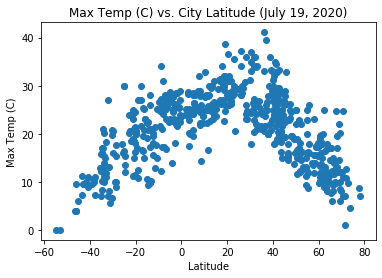

In [49]:
# CELL 11
# VERIFIED AS WORKING
# Plot max temp vs. latitude

# Add the linear regression equation and line to plot
x_values = clean_city_data_df['Latitude']
y_values = clean_city_data_df['Max Temp (C)']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Max Temp (C) vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig1_Temp_v_Lat.png")
plt.show()

## Latitude vs. Humidity Plot

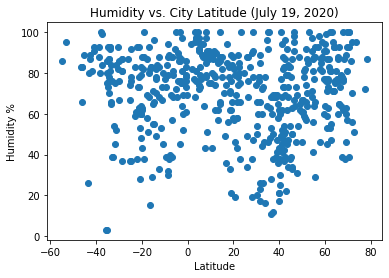

In [50]:
# CELL 12
# VERIFIED AS WORKING
# Plot humidity vs. latitude

# Add the linear regression equation and line to plot
x_values = clean_city_data_df['Latitude']
y_values = clean_city_data_df['Humidity']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig2_Humidity_v_Lat.png")
plt.show()

## Latitude vs. Cloudiness Plot

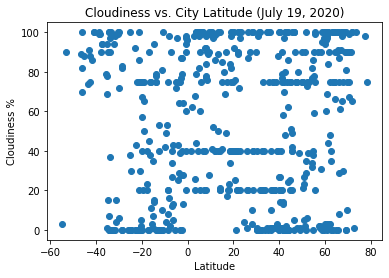

In [51]:
# CELL 13
# VERIFIED AS WORKING
# Plot cloudiness vs. latitude

# Add the linear regression equation and line to plot
x_values = clean_city_data_df['Latitude']
y_values = clean_city_data_df['Cloudiness']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Cloudiness vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig3_Cloudiness_v_Lat.png")
plt.show()

## Latitude vs. Wind Speed Plot

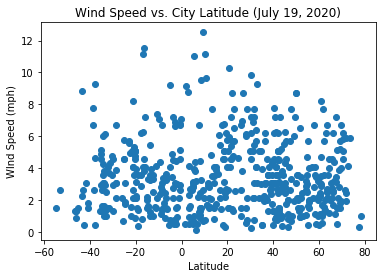

In [52]:
# CELL 14
# VERIFIED AS WORKING
# Plot wind speed vs. latitude

# Add the linear regression equation and line to plot
x_values = clean_city_data_df['Latitude']
y_values = clean_city_data_df['Wind Speed']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('WInd Speed (mph)')
plt.title('Wind Speed vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig4_Wind_Speed_v_Lat.png")
plt.show()

## Linear Regression

In [53]:
# CELL 15
# OPTIONAL: Create a function to create Linear Regression plots

In [54]:
# CELL 16
# Create Northern and Southern Hemisphere DataFrames

# DEBUG!! > not supported
max_temp_n_hemi_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] > 0, :]
max_temp_s_hemi_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] < 0, :]
max_temp_n_hemi_df

,City,Latitude,Longitude,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,33.33,39,80,4.50,US,1595280523
1,kapaa,22.08,-159.32,28.00,74,90,5.70,US,1595280803
4,khasan,42.43,130.64,19.69,87,48,3.59,RU,1595281275
5,lagoa,39.05,-27.98,20.85,69,3,2.35,PT,1595280525
7,barrow,71.29,-156.79,1.00,86,90,2.60,US,1595280828
...,...,...,...,...,...,...,...,...,...
538,marsa matruh,31.35,27.25,25.00,78,0,2.10,EG,1595281350
539,banda aceh,5.56,95.32,26.39,79,90,0.62,ID,1595281350
540,vung tau,10.35,107.08,27.65,75,100,0.74,VN,1595281350
542,billings,45.78,-108.50,26.11,34,40,5.70,US,1595281236


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

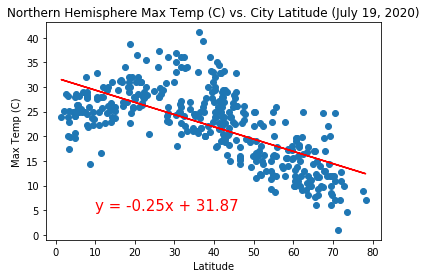

In [55]:
# CELL 17
# INCLUDE R-SQUARED VALUE
# plot northern hemisphere max temp vs. latitude with linear regression

# Add the linear regression equation and line to plot
x_values = max_temp_n_hemi_df['Latitude']
y_values = max_temp_n_hemi_df['Max Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Northern Hemisphere Max Temp (C) vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig5_Temp_N_Hemisphere_v_Lat.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

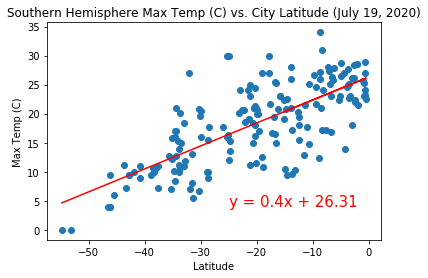

In [56]:
# CELL 18
# INCLUDE R-SQUARED VALUE
# plot southern hemisphere max temp vs. latitude with linear regression

# Add the linear regression equation and line to plot
x_values = max_temp_s_hemi_df['Latitude']
y_values = max_temp_s_hemi_df['Max Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,4),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Southern Hemisphere Max Temp (C) vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig6_Temp_S_Hemisphere_v_Lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

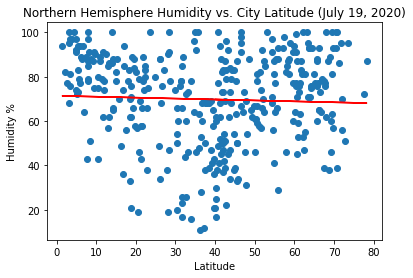

In [57]:
# CELL 19
# INCLUDE R-SQUARED VALUE
# plot northern hemisphere humidity vs. latitude with linear regression

# Add the linear regression equation and line to plot
x_values = max_temp_n_hemi_df['Latitude']
y_values = max_temp_n_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere Humidity vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig7_Humidity_N_Hemisphere_v_Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

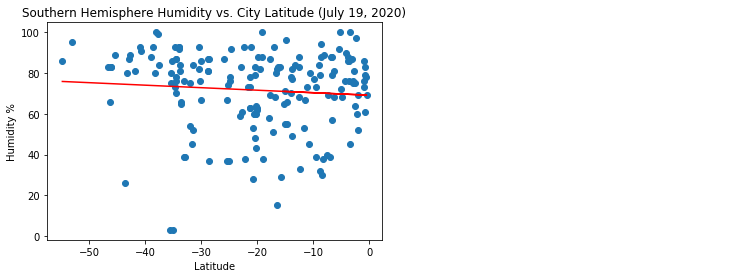

In [58]:
# CELL 20
# INCLUDE R-SQUARED VALUE
# plot southern hemisphere humidity vs. latitude with linear regression

# Add the linear regression equation and line to plot
x_values = max_temp_s_hemi_df['Latitude']
y_values = max_temp_s_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere Humidity vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig8_Humidity_S_Hemisphere_v_Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

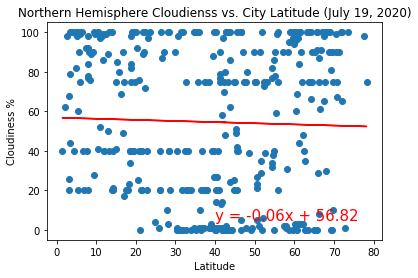

In [59]:
# CELL 21
# INCLUDE R-SQUARED VALUE
# plot northern hemisphere cloudiness vs. latitude with linear regression

# Add the linear regression equation and line to plot
x_values = max_temp_n_hemi_df['Latitude']
y_values = max_temp_n_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere Cloudienss vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig9_Cloudiness_N_Hemisphere_v_Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

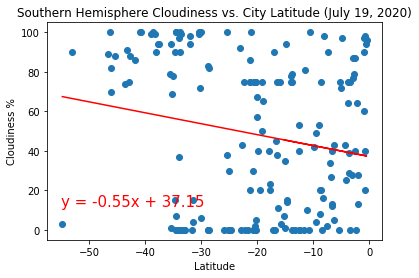

In [60]:
# CELL 22
# INCLUDE R-SQUARED VALUE
# plot southern hemisphere cloudiness vs. latitude with linear regression

# Add the linear regression equation and line to plot
x_values = max_temp_s_hemi_df['Latitude']
y_values = max_temp_s_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Southern Hemisphere Cloudiness vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig10_Cloudiness_S_Hemisphere_v_Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

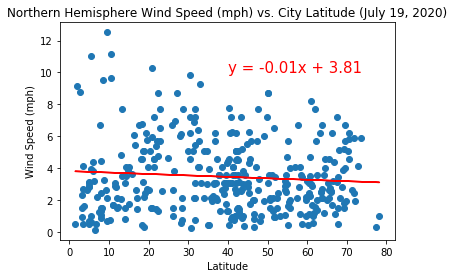

In [61]:
# CELL 23
# INCLUDE R-SQUARED VALUE
# plot northern hemisphere wind speed vs. latitude with linear regression

# Add the linear regression equation and line to plot
x_values = max_temp_n_hemi_df['Latitude']
y_values = max_temp_n_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed (mph) vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig11_Wind_Speed_N_Hemisphere_v_Lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

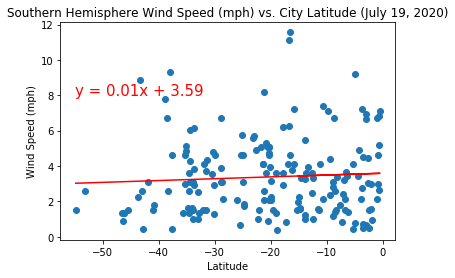

In [62]:
# CELL 24
# INCLUDE R-SQUARED VALUE
# plot southern hemisphere wind speed vs. latitude with linear regression

# Add the linear regression equation and line to plot
x_values = max_temp_s_hemi_df['Latitude']
y_values = max_temp_s_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed (mph) vs. City Latitude (July 19, 2020)')
plt.savefig("../Output/Fig12_Wind_Speed_S_Hemisphere_v_Lat.png")
plt.show()